# CIFAR-10 Tensorflow

### Dataset and File Structure

Download CIFAR-10 Dataset here: https://www.cs.toronto.edu/~kriz/cifar.html

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

import sys

### Versions used in this project

In [2]:
print('Python version:', sys.version)
print('tensorflow version:', tf.__version__)

Python version: 3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)]
tensorflow version: 1.12.0


### Init Variables

In [3]:
img_size = 32
n_channels = 3
img_size_flat = img_size * img_size * n_channels
n_classes = 10

n_files = 5
n_img_file = 10000
n_img_train = n_files * n_img_file

### Utility functions

In [4]:
def unpickle(file):
    """
    Unpickle dataset
    """
    
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
def img_converter(raw):
    """
    Convert images from the CIFAR-10 format and
    Return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert raw images to floats
    raw_conv = np.array(raw, dtype=float) / 255.0
    # Reshape
    img = raw_conv.reshape([-1, n_channels, img_size, img_size])
    # Reorder the indices of the array.
    img = img.transpose([0, 2, 3, 1])
    
    return img

In [6]:
def load_class_names():
    """
    Load class names
    Return a list with class names
    """

    # Load from pickled file
    raw = unpickle(filename='cifar-10-batches-py/batches.meta')[b'label_names']
    # Convert from binary strings
    names = [x.decode('utf-8') for x in raw]

    return names

In [7]:
def load_data(file):
    """
    Load dataset
    Return converted images and respective class
    """

    # Get data
    data = unpickle(file)
    raw = data[b'data']
    target = np.array(data[b'labels'])
    img = img_converter(raw)

    return img, target

In [8]:
def load_training_data():
    """
    Load training data from all data files
    Return images and respective classes
    """

    img = np.zeros(shape=[n_img_train, img_size, img_size, n_channels], dtype=float)
    target = np.zeros(shape=[n_img_train], dtype=int)
    begin = 0

    for i in range(n_files):
        img_batch, target_batch = load_data(file = 'cifar-10-batches-py/data_batch_' + str(i+1))
        n_img = len(img_batch)
        end = begin + n_img
        img[begin:end, :] = img_batch
        target[begin:end] = target_batch
        begin = end

    return img, target, OneHotEncoder(categories=target)

def load_test_data():
    """
    Load test data from all data files
    Return images and respective classes
    """

    img, target = load_data(file='cifar-10-batches-py/test_batch')

    return img, target, OneHotEncoder(categories=target)

### Load Data

In [9]:
train_img = load_training_data();
test_img = load_test_data();

In [10]:
print(train_img[0].shape)
print(train_img[1].shape)

(50000, 32, 32, 3)
(50000,)


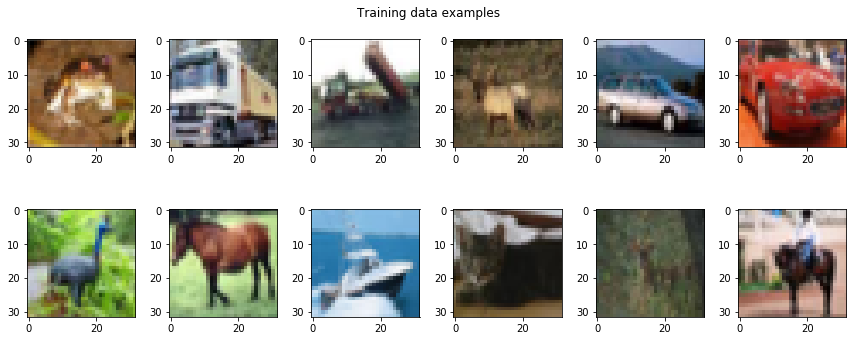

In [11]:
plt.figure(figsize=(12, 5))
plt.suptitle('Training data examples')
for i in range(12):
    plt.subplot(2, 6, i+1)
    plt.imshow(train_img[0][i][:])
plt.tight_layout()
